In [12]:
import sys
!pip install gymnasium

In [13]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F #INM707 Lab 8
import random
import jungle
from jungleenv import JungleEnv
import dqn
import matplotlib.pyplot as plt
from collections import namedtuple, deque
import torch.optim as optim

In [14]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print("cuda")
else:
  device = torch.device("cpu") 
  print("cpu")

cpu


In [15]:
#Set Q Learning parameters
experiment_name = "exp1"
episodes = 1000


parameters = [
    {"experiment_id":1, "seed":45, "algorithm":"Double", "episodes":episodes, "epsilon": 0.9, "gamma":0.9, "epsilon_decay":0.9999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}
    ,{"experiment_id":2, "seed":45, "algorithm":"Double", "episodes":episodes, "epsilon": 0.9, "gamma":0.7, "epsilon_decay":0.9999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}
    ,{"experiment_id":3, "seed":45, "algorithm":"Double", "episodes":episodes, "epsilon": 0.9, "gamma":0.5, "epsilon_decay":0.9999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}
    ,{"experiment_id":4, "seed":45, "algorithm":"Double", "episodes":episodes, "epsilon": 0.9, "gamma":0.3, "epsilon_decay":0.9999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}
    ,{"experiment_id":5, "seed":45, "algorithm":"Double", "episodes":episodes, "epsilon": 0.9, "gamma":0, "epsilon_decay":0.9999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}
    #{"experiment_id":5, "seed":45, "algorithm":"Classic", "episodes":episodes, "epsilon": 0.9, "gamma":0, "epsilon_decay":0.999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}

]
                         

In [16]:
env = JungleEnv(7)
kwargs = {}

results = []
for kwargs in parameters:
    if kwargs["algorithm"] == "Classic":
      dqnagent = dqn.ClassicDQNAgent(env, **kwargs)
    else:
        dqnagent = dqn.DoubleDQNAgent(env,**kwargs)

    results += dqnagent.train(experiment_id = kwargs["experiment_id"],episodes=kwargs["episodes"], seed=kwargs["seed"])




Episode 0 Reward 4898 Epsilon 0.9 Steps Taken 62 Topography E
Episode 10 Reward 329 Epsilon 0.8991004048920191 Steps Taken 35 Topography S
Episode 20 Reward 6127 Epsilon 0.8982017089744363 Steps Taken 157 Topography E
Episode 30 Reward 4997 Epsilon 0.8973039113484657 Steps Taken 4 Topography E
Episode 40 Reward 5458 Epsilon 0.8964070111162198 Steps Taken 24 Topography E
Episode 50 Reward 4995 Epsilon 0.8955110073807085 Steps Taken 6 Topography E
Episode 60 Reward 4796 Epsilon 0.8946158992458387 Steps Taken 89 Topography E
Episode 70 Reward 1293 Epsilon 0.8937216858164124 Steps Taken 59 Topography S
Episode 80 Reward -144 Epsilon 0.8928283661981269 Steps Taken 20 Topography S
Episode 90 Reward 5350 Epsilon 0.891935939497573 Steps Taken 72 Topography E
Episode 100 Reward 4990 Epsilon 0.8910444048222346 Steps Taken 7 Topography E
Episode 110 Reward 4895 Epsilon 0.8901537612804878 Steps Taken 49 Topography E
Episode 120 Reward 4986 Epsilon 0.8892640079816001 Steps Taken 11 Topography E
Epi

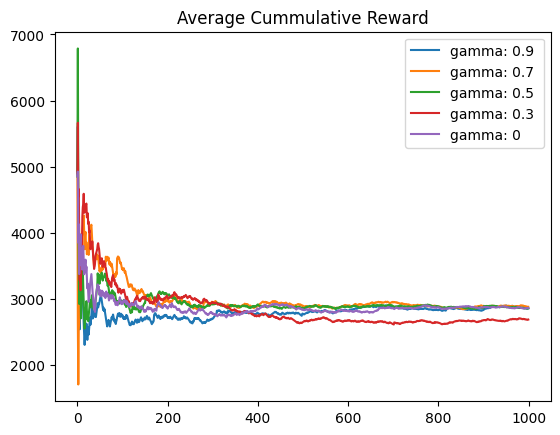

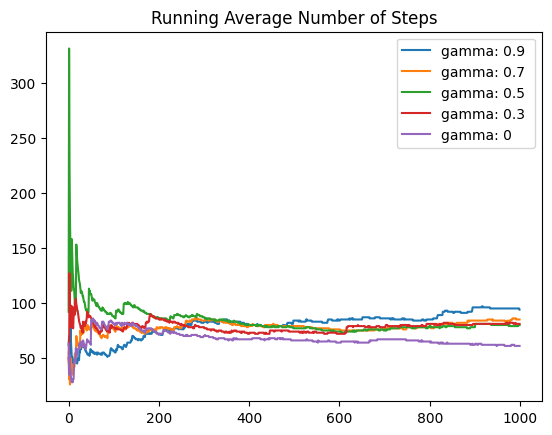

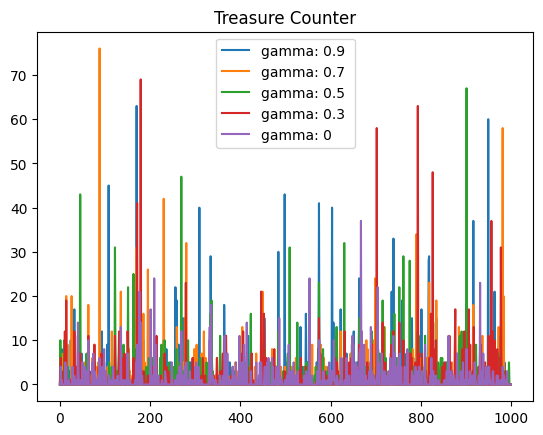

In [17]:
for params in parameters:
    # Get the experiment id
    id = params["experiment_id"]
    display_params = params["display"]
    # Get all the results for this experiment
    exp_res = [res for res in results if res["experiment_id"] == id]

    
    
    # Build the label
    display_label = ""
    for item in display_params:
        display_label += item + ": " + str(params[item]) + " "


    # For the experiment, get the metrics to display
    rewards = np.array([[res["episode"], res["episode_reward"], 0] for res in exp_res])
    steps_in_episode = np.array([[res["episode"], res["steps_taken"], 0] for res in exp_res])
    ending_topography = np.array([[res["episode"], res["topography"], 0] for res in exp_res])
    treasure_counter = np.array([[res["episode"], res["treasure_counter"], 0] for res in exp_res])


    for i in range(len(rewards)):
        rewards[i][2] = sum(rewards[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward
        steps_in_episode[i][2] = sum(steps_in_episode[0:i + 1, [1]]) / (i + 1)  # calculate the average number of steps
        #treasure_counter[i][2] = sum(treasure_counter[0:i + 1, [1]]) / (i + 1)  # calculate the average number of steps
   
    plt.figure(1)
    plt.plot(rewards[:, [0]], rewards[:, [2]], label=display_label)
    plt.title("Average Cummulative Reward")
    plt.figure(2)
    plt.plot(steps_in_episode[:, [0]], steps_in_episode[:, [2]], label=display_label)
    plt.title("Running Average Number of Steps")
    plt.figure(3)
    plt.plot(treasure_counter[:, [0]], treasure_counter[:, [1]], label=display_label)
    plt.title("Treasure Counter")


plt.figure(1)
plt.legend()

plt.figure(2)
plt.legend()

plt.figure(3)
plt.legend()


plt.show()
